# WTWY NYC MTA Analysis for optimized approch by streat teams

##### WTWY
##### GALA DATE: june 2022. 

##### DATA COLLECTION:
##### 3 MONTHS(MARCH , APRIL , MAY 2021) OF DATA

### GOALS OF CODE:
### Find the highly congested/TRAFFIC stations and with that focus on:
### High traffic hours
### High traffic days of the week.

#### ULTIMATE GOAL:
#### SUGGESTED SCHEDULE OF APPROACH FOR THE STREET TEAMS OF WTWY.



In [1]:
import pandas as pd
import matplotlib as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [2]:
engine = create_engine("sqlite:///mta_data.db")

In [3]:
mta_data = pd.read_sql('SELECT * FROM mta_data;', engine)
mta_data 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,00:00:00,REGULAR,7575503,2588978
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,04:00:00,RECOVR AUD,7575515,2588982
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,08:00:00,REGULAR,7575523,2588989
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,12:00:00,REGULAR,7575557,2588996
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,16:00:00,REGULAR,7575630,2589008
...,...,...,...,...,...,...,...,...,...,...,...
2717752,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/05/2021,04:00:00,REGULAR,5554,544
2717753,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/05/2021,08:00:00,REGULAR,5554,544
2717754,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/05/2021,12:00:00,REGULAR,5554,544
2717755,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/05/2021,16:00:00,REGULAR,5554,544


In [4]:
# GRABBING THE COLUMN NAMES
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
# TOTAL AMOUNT OF DATA IN DATASET
mta_data2 = pd.read_sql('SELECT COUNT(*) FROM mta_data;', engine)
mta_data2

,COUNT(*)
0,2717757


In [6]:
# TRYING TO FIND OUT IF THERE ARE ANY NULLS IN THE ENTRIES COLUMN
mta_data3_entnull = pd.read_sql('SELECT * FROM mta_data WHERE ENTRIES IS NULL;', engine)
mta_data3_entnull

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


In [7]:
# TRYING TO FIND OUT IF THERE ARE ANY NULLS IN THE EXITS COLUMN
mta_data4_exnull = pd.read_sql('SELECT * FROM mta_data WHERE EXITS IS NULL;', engine)
mta_data4_exnull

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


In [8]:
# GRABBING ALL THE DATA REGARDING "GRD CNTRL-42 ST" STATION ORDERED BY DATE
mta_data4_GRDORDDATE = pd.read_sql('SELECT * FROM mta_data WHERE STATION = "GRD CNTRL-42 ST" ORDER BY DATE ;', engine)
mta_data4_GRDORDDATE

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,02/27/2021,00:00:00,REGULAR,50,174
1,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,02/27/2021,04:00:00,REGULAR,50,174
2,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,02/27/2021,08:00:00,REGULAR,50,174
3,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,02/27/2021,12:00:00,REGULAR,50,180
4,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,02/27/2021,16:00:00,REGULAR,50,180
...,...,...,...,...,...,...,...,...,...,...,...
48621,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,05/28/2021,05:00:00,REGULAR,923275,38827
48622,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,05/28/2021,09:00:00,REGULAR,923280,38829
48623,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,05/28/2021,13:00:00,REGULAR,923287,38830
48624,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,05/28/2021,17:00:00,REGULAR,923331,38836


In [9]:
# 3 MONTHS(MARCH , APRIL , MAY 2021) OF DATA
mta_data.DATE.value_counts().sort_index()

02/27/2021    29985
02/28/2021    29763
03/01/2021    29868
03/02/2021    29803
03/03/2021    29871
              ...  
05/24/2021    29828
05/25/2021    29855
05/26/2021    29834
05/27/2021    29905
05/28/2021    29894
Name: DATE, Length: 91, dtype: int64

In [10]:
# This could show us what is basically min and max of daily data for us
mta_data.DATE.value_counts().sort_index().describe()

count       91.000000
mean     29865.461538
std        302.217997
min      27156.000000
25%      29825.000000
50%      29868.000000
75%      29929.500000
max      30321.000000
Name: DATE, dtype: float64

In [11]:
# This could show us what is basically min and max of daily data for us
mta_data.TIME.value_counts()

16:00:00    222435
08:00:00    222401
20:00:00    222400
12:00:00    222392
04:00:00    222378
             ...  
22:51:59         1
18:39:59         1
14:27:59         1
10:15:59         1
07:16:30         1
Name: TIME, Length: 56638, dtype: int64

In [12]:
# we can see there are many counts of different hours but 
#the hours that we mostly see which are 00:00 - 04:00 - - 08:00 - 12:00 - 16:00 - 20:00 
mta_data.TIME.value_counts().head(10)

16:00:00    222435
08:00:00    222401
20:00:00    222400
12:00:00    222392
04:00:00    222378
00:00:00    221667
21:00:00    144488
17:00:00    144445
05:00:00    144442
13:00:00    144393
Name: TIME, dtype: int64

In [13]:
#SHAPE OF THE DATA ( R, C)
mta_data.shape

(2717757, 11)

In [14]:
# DTYPES OF COLUMNS
mta_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717757 entries, 0 to 2717756
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 228.1+ MB


In [15]:
#JUST AN OVER ALL DICRIPTION OF DATA (MIN, MAX MEAN , ....)
mta_data.describe()

,ENTRIES,EXITS
count,2.717757e+06,2.717757e+06
mean,4.191390e+07,3.370046e+07
std,2.184118e+08,1.935130e+08
min,0.000000e+00,0.000000e+00
25%,2.182960e+05,9.292700e+04
50%,1.458820e+06,8.723310e+05
75%,6.120656e+06,4.025068e+06
max,2.147432e+09,2.123010e+09


In [16]:
# WORKING ON A COPY IN ORDER TO BE CAUTIONS
mta_2 = mta_data.copy(deep=False)

In [17]:
# SAMPLING 50 FROM OUR DATA FOR OBSERVATION
mta_2.sample(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
253719,K026,R100,00-00-02,METROPOLITAN AV,M,BMT,05/17/2021,20:00:00,REGULAR,925357,1039403
987978,R201,R041,00-03-04,BOWLING GREEN,45,IRT,04/25/2021,12:00:00,REGULAR,4851003,6359806
740320,N602,R259,00-00-02,ROOSEVELT ISLND,F,IND,05/04/2021,20:00:00,REGULAR,5624522,4719130
27031,D008,R392,00-06-01,18 AV,N,BMT,05/22/2021,13:00:00,REGULAR,1374979,445773
2706734,R605,R456,00-03-00,HOYT ST,23,IRT,03/01/2021,07:00:00,REGULAR,1755041,3915995
1067715,C014,R246,00-03-01,PROSPECT AV,R,BMT,04/23/2021,20:00:00,REGULAR,388343,186381
934859,N501,R020,01-03-01,47-50 STS ROCK,BDFM,IND,04/28/2021,12:00:00,REGULAR,18747521,17463144
991570,R215,R322,00-00-02,SPRING ST,6,IRT,04/30/2021,16:00:00,REGULAR,14301963,2303188
70854,N138,R355,01-04-00,111 ST,A,IND,05/22/2021,17:00:00,REGULAR,50331896,16777216
104815,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/25/2021,13:00:00,REGULAR,14106914,11925424


In [18]:
import datetime

In [19]:
# Take the date and time fields into a single datetime column
mta_2["DATE_TIME"] = pd.to_datetime(mta_2.DATE + " " + mta_2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [20]:
# DATE_TIME COLUMN HAS BEEN ADDED TO THE END AND NEEDS TO BE RELOCATED BEFORE DATE
mta_2.sample()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2236854,R168A,R168,00-03-01,96 ST,123,IRT,03/17/2021,01:00:00,REGULAR,4295426,5411134,2021-03-17 01:00:00


In [21]:
# REORDERING THE COLUMN NAMES AFTER ADDING DATE_TIME
mta_2 = mta_2.reindex(columns=['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE_TIME',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS'
 ])

In [22]:
mta_2.sample()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_TIME,DATE,TIME,DESC,ENTRIES,EXITS
1691311,B023,R211,01-06-00,KINGS HWY,BQ,BMT,2021-03-31 20:00:00,03/31/2021,20:00:00,REGULAR,756247958,436754659


In [23]:
#SANITY CHECK: CHEKING EXTRAORDINARY MIN MAX AND ASLO NEGATIVE VALUES
print('Descriptions of entries:')
print(mta_2['ENTRIES'].describe())
print('')
print('Descriptions of exits:')
print(mta_2['EXITS'].describe())

Descriptions of entries:
count    2.717757e+06
mean     4.191390e+07
std      2.184118e+08
min      0.000000e+00
25%      2.182960e+05
50%      1.458820e+06
75%      6.120656e+06
max      2.147432e+09
Name: ENTRIES, dtype: float64

Descriptions of exits:
count    2.717757e+06
mean     3.370046e+07
std      1.935130e+08
min      0.000000e+00
25%      9.292700e+04
50%      8.723310e+05
75%      4.025068e+06
max      2.123010e+09
Name: EXITS, dtype: float64


In [24]:
#SANITY CHECK: LOOKING OF DUPLICATES
(mta_2
 .groupby(["C/A" , "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
737501,N071,R013,00-00-04,34 ST-PENN STA,2021-04-08 08:00:00,2
833187,N100,R252,00-00-00,HIGH ST,2021-03-09 07:00:00,2
833181,N100,R252,00-00-00,HIGH ST,2021-03-08 07:00:00,2
833182,N100,R252,00-00-00,HIGH ST,2021-03-08 11:00:00,2
833183,N100,R252,00-00-00,HIGH ST,2021-03-08 15:00:00,2
...,...,...,...,...,...,...
905935,N128,R200,00-00-05,EUCLID AV,2021-03-16 20:00:00,1
905936,N128,R200,00-00-05,EUCLID AV,2021-03-17 00:00:00,1
905937,N128,R200,00-00-05,EUCLID AV,2021-03-17 04:00:00,1
905938,N128,R200,00-00-05,EUCLID AV,2021-03-17 08:00:00,1


In [25]:
# CREATING A MASK OUT OF ONE OF THE SAMPLES OF DUPLICATES IN ORDER TO ANALYZE
mask = ((mta_2["C/A"] == "N071") &
        (mta_2["UNIT"] == "R013") & 
        (mta_2["SCP"] == "00-00-04")&
        (mta_2["STATION"] == "34 ST-PENN STA") &
(mta_2["DATE_TIME"].dt.date == datetime.datetime(2021, 4, 8).date()))

mta_2[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_TIME,DATE,TIME,DESC,ENTRIES,EXITS
1521065,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 00:00:00,04/08/2021,00:00:00,REGULAR,1871551,39764
1521066,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 04:00:00,04/08/2021,04:00:00,REGULAR,1871552,39768
1521067,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 06:40:30,04/08/2021,06:40:30,REGULAR,11289337,10471686
1521068,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 06:41:49,04/08/2021,06:41:49,REGULAR,11289337,10471689
1521069,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 08:00:00,04/08/2021,08:00:00,REGULAR,11289423,10471731
1521070,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 08:00:00,04/08/2021,08:00:00,RECOVR AUD,1871567,39821
1521071,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 12:00:00,04/08/2021,12:00:00,RECOVR AUD,1871647,39885
1521072,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 16:00:00,04/08/2021,16:00:00,REGULAR,1871826,39928
1521073,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-04-08 20:00:00,04/08/2021,20:00:00,REGULAR,1872033,39967


In [26]:
#THERE SEEMS TO BE AN IRREGULAR DATA AT THIS STATION BUT MAINLY 
#THERE IS A REPETTIOTION GOING ON AT 2021-04-08 08:00:00 
#WITH DESC REGULAR AND RECOVER AUD

In [27]:
# CHECKING ANOTHER STATION FOR DUBLICATE OBSERVATION
mask = ((mta_2["C/A"] == "N100") &
        (mta_2["UNIT"] == "R252") & 
        (mta_2["SCP"] == "00-00-00")&
        (mta_2["STATION"] == "HIGH ST") &
(mta_2["DATE_TIME"].dt.date == datetime.datetime(2021, 3, 9).date()))

mta_2[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_TIME,DATE,TIME,DESC,ENTRIES,EXITS
2363565,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 03:00:00,03/09/2021,03:00:00,REGULAR,818043,1730673
2363566,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 03:00:00,03/09/2021,03:00:00,RECOVR AUD,818272,1731687
2363567,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 07:00:00,03/09/2021,07:00:00,REGULAR,818050,1730744
2363568,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 07:00:00,03/09/2021,07:00:00,RECOVR AUD,818272,1731687
2363569,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 11:00:00,03/09/2021,11:00:00,REGULAR,818117,1731066
2363570,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 11:00:00,03/09/2021,11:00:00,RECOVR AUD,818272,1731687
2363571,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 15:00:00,03/09/2021,15:00:00,REGULAR,818211,1731234
2363572,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 15:00:00,03/09/2021,15:00:00,RECOVR AUD,818272,1731687
2363573,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 19:00:00,03/09/2021,19:00:00,RECOVR AUD,818272,1731687
2363574,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-09 23:00:00,03/09/2021,23:00:00,REGULAR,818274,1731707


In [28]:
#AS OBSERVED, SO MANY OF THE RECOVER AUG ARE DUBPLICATES OF THE REGULAR DATA

In [29]:
mta_2.DESC.value_counts()

REGULAR       2707755
RECOVR AUD      10002
Name: DESC, dtype: int64

In [30]:
#DELETING ALL DUPLICATE DATA
mta_2.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
mta_2.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [31]:
(mta_2
 .groupby(["C/A" , "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1811779,R138,R293,00-05-01,34 ST-PENN STA,2021-04-17 02:00:00,1
1811781,R138,R293,00-05-01,34 ST-PENN STA,2021-04-17 10:00:00,1
1811782,R138,R293,00-05-01,34 ST-PENN STA,2021-04-17 14:00:00,1
1811783,R138,R293,00-05-01,34 ST-PENN STA,2021-04-17 18:00:00,1
...,...,...,...,...,...,...
905893,N128,R200,00-00-05,EUCLID AV,2021-03-09 19:00:00,1
905894,N128,R200,00-00-05,EUCLID AV,2021-03-09 23:00:00,1
905895,N128,R200,00-00-05,EUCLID AV,2021-03-10 03:00:00,1
905896,N128,R200,00-00-05,EUCLID AV,2021-03-10 07:00:00,1


In [32]:
# WE HAVE ELIMINATED ALL THE DUPLICATES FROM OUR DATA AS OF NOW!

#mta_hourly_df['TIME'] = mta_hourly_df['DATE_TIME'].dt.time
#mta_hourly_df[‘DA’TE] = mta_hourly_df['DATE_TIME'].dt.date

In [33]:
# Just Checking the ENTRIES by STATION and not turnstile
(mta_2
 .groupby([ "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,STATION,DATE_TIME,ENTRIES
44267,34 ST-PENN STA,2021-04-26 12:00:00,77
44159,34 ST-PENN STA,2021-04-17 12:00:00,77
44145,34 ST-PENN STA,2021-04-16 08:00:00,77
44147,34 ST-PENN STA,2021-04-16 12:00:00,77
44149,34 ST-PENN STA,2021-04-16 16:00:00,77
...,...,...,...
237103,LACKAWANNA,2021-05-07 00:25:55,1
237104,LACKAWANNA,2021-05-07 00:31:10,1
237105,LACKAWANNA,2021-05-07 00:43:23,1
237106,LACKAWANNA,2021-05-07 01:01:30,1


In [34]:
mta_turnstiles_daily_EE = (mta_2
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        [['ENTRIES','EXITS']].first())

In [35]:
mta_turnstiles_daily_EE

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,7537255,2570434
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2570445
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2570500
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2570546
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2570582
...,...,...,...,...,...,...,...
2717673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 08:20:35,5554,577
2717674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 09:00:00,5554,577
2717675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 13:00:00,5554,577
2717676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 17:00:00,5554,577


In [36]:
mta_turnstiles_daily_EE[["PREV_DATE_TIME", "PREV_ENTRIES",'PERV_EXITS']] = (mta_turnstiles_daily_EE
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE_TIME", "ENTRIES",'EXITS']]
                                                       .shift(1))

In [37]:
mta_turnstiles_daily_EE

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PERV_EXITS
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,7537255,2570434,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2570445,2021-02-27 03:00:00,7537255.0,2570434.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2570500,2021-02-27 07:00:00,7537260.0,2570445.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2570546,2021-02-27 11:00:00,7537285.0,2570500.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2570582,2021-02-27 15:00:00,7537354.0,2570546.0
...,...,...,...,...,...,...,...,...,...,...
2717673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 08:20:35,5554,577,2021-05-28 05:00:00,5554.0,577.0
2717674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 09:00:00,5554,577,2021-05-28 08:20:35,5554.0,577.0
2717675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 13:00:00,5554,577,2021-05-28 09:00:00,5554.0,577.0
2717676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 17:00:00,5554,577,2021-05-28 13:00:00,5554.0,577.0


In [38]:
# DROPPED NAN
mta_turnstiles_daily_EE.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)

In [39]:
mta_turnstiles_daily_EE

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PERV_EXITS
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2570445,2021-02-27 03:00:00,7537255.0,2570434.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2570500,2021-02-27 07:00:00,7537260.0,2570445.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2570546,2021-02-27 11:00:00,7537285.0,2570500.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2570582,2021-02-27 15:00:00,7537354.0,2570546.0
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2570596,2021-02-27 19:00:00,7537501.0,2570582.0
...,...,...,...,...,...,...,...,...,...,...
2717673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 08:20:35,5554,577,2021-05-28 05:00:00,5554.0,577.0
2717674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 09:00:00,5554,577,2021-05-28 08:20:35,5554.0,577.0
2717675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 13:00:00,5554,577,2021-05-28 09:00:00,5554.0,577.0
2717676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 17:00:00,5554,577,2021-05-28 13:00:00,5554.0,577.0


In [40]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

mta_turnstiles_daily_EE["DAILY_ENTRIES"] = mta_turnstiles_daily_EE.apply(get_daily_counts, axis=1, max_counter=10000)

entries: 22 <-- 6641481.0
entries: 6 <-- 154694.0
entries: 3082 <-- 1390173.0
entries: 29 <-- 479907.0
entries: 18 <-- 4341004.0
entries: 25 <-- 11715665.0
entries: 375 <-- 18398491.0
entries: 262161 <-- 337910.0
entries: 2323 <-- 986428.0
entries: 262144 <-- 1.0
entries: 18182709 <-- 5120087.0
entries: 5120226 <-- 18182709.0
entries: 9728986 <-- 1159624.0
entries: 1159708 <-- 9728986.0
entries: 692904 <-- 5769943.0
entries: 5770052 <-- 692904.0
entries: 56092 <-- 41866.0
entries: 41866 <-- 56092.0
entries: 1400021 <-- 46231.0
entries: 46231 <-- 1400021.0
entries: 2419 <-- 247401.0
entries: 247401 <-- 2420.0
entries: 10 <-- 247996.0
entries: 327680 <-- 756269765.0
entries: 39 <-- 328024.0
entries: 262152 <-- 553649999.0
entries: 4 <-- 262152.0
entries: 262152 <-- 4.0
entries: 25 <-- 262152.0
entries: 262152 <-- 229572623.0
entries: 0 <-- 5309746.0
entries: 262145 <-- 568.0
entries: 68 <-- 1640915.0
entries: 524289 <-- 132.0
entries: 262144 <-- 0.0
entries: 262227 <-- 32237.0
entries: 5

In [41]:
def get_daily_counts_EX(row, max_counter):
    counter = row["EXITS"] - row["PERV_EXITS"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'exits: {row["EXITS"]} <-- {row["PERV_EXITS"]}')
        counter = min(row["EXITS"], row["PERV_EXITS"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

mta_turnstiles_daily_EE["DAILY_EXITS"] = mta_turnstiles_daily_EE.apply(get_daily_counts_EX, axis=1, max_counter=10000)

exits: 8 <-- 8869858.0
exits: 4 <-- 167444.0
exits: 517 <-- 995824.0
exits: 62 <-- 154058.0
exits: 6 <-- 808418.0
exits: 50 <-- 29823169.0
exits: 154 <-- 7504853.0
exits: 7 <-- 67960.0
exits: 277 <-- 662107.0
exits: 17166513 <-- 2567144.0
exits: 2567236 <-- 17166513.0
exits: 11343332 <-- 868404.0
exits: 868460 <-- 11343332.0
exits: 994878 <-- 10733000.0
exits: 10733162 <-- 994878.0
exits: 57421 <-- 18983.0
exits: 18984 <-- 57422.0
exits: 305168 <-- 11893.0
exits: 11893 <-- 305168.0
exits: 19514 <-- 100001.0
exits: 100001 <-- 19522.0
exits: 17 <-- 100324.0
exits: 38 <-- 436767843.0
exits: 0 <-- 469762048.0
exits: 8 <-- 763625201.0
exits: 0 <-- 3196184.0
exits: 32 <-- 16364.0
exits: 11 <-- 2192493.0
exits: 9 <-- 197920.0
exits: 20 <-- 1075170.0
exits: 23 <-- 37546.0
exits: 10 <-- 60574.0
exits: 18 <-- 1481727.0
exits: 0 <-- 1377959.0
exits: 28 <-- 39891.0
exits: 671146375 <-- 2645729.0
exits: 2 <-- 2375276.0
exits: 1 <-- 440948.0
exits: 3 <-- 112357.0
exits: 0 <-- 67865.0
exits: 1 <-- 46

In [42]:
mta_turnstiles_daily_EE

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PERV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2570445,2021-02-27 03:00:00,7537255.0,2570434.0,5.0,11.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2570500,2021-02-27 07:00:00,7537260.0,2570445.0,25.0,55.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2570546,2021-02-27 11:00:00,7537285.0,2570500.0,69.0,46.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2570582,2021-02-27 15:00:00,7537354.0,2570546.0,147.0,36.0
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2570596,2021-02-27 19:00:00,7537501.0,2570582.0,88.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2717673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 08:20:35,5554,577,2021-05-28 05:00:00,5554.0,577.0,0.0,0.0
2717674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 09:00:00,5554,577,2021-05-28 08:20:35,5554.0,577.0,0.0,0.0
2717675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 13:00:00,5554,577,2021-05-28 09:00:00,5554.0,577.0,0.0,0.0
2717676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 17:00:00,5554,577,2021-05-28 13:00:00,5554.0,577.0,0.0,0.0


In [43]:
mta_turnstiles_daily_EE['TOTAL TRAFFIC'] = mta_turnstiles_daily_EE['DAILY_ENTRIES'].values + mta_turnstiles_daily_EE['DAILY_EXITS'].values

In [44]:
mta_turnstiles_daily_EE

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PERV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2570445,2021-02-27 03:00:00,7537255.0,2570434.0,5.0,11.0,16.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2570500,2021-02-27 07:00:00,7537260.0,2570445.0,25.0,55.0,80.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2570546,2021-02-27 11:00:00,7537285.0,2570500.0,69.0,46.0,115.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2570582,2021-02-27 15:00:00,7537354.0,2570546.0,147.0,36.0,183.0
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2570596,2021-02-27 19:00:00,7537501.0,2570582.0,88.0,14.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 08:20:35,5554,577,2021-05-28 05:00:00,5554.0,577.0,0.0,0.0,0.0
2717674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 09:00:00,5554,577,2021-05-28 08:20:35,5554.0,577.0,0.0,0.0,0.0
2717675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 13:00:00,5554,577,2021-05-28 09:00:00,5554.0,577.0,0.0,0.0,0.0
2717676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-28 17:00:00,5554,577,2021-05-28 13:00:00,5554.0,577.0,0.0,0.0,0.0


In [45]:
mta_turnstiles_daily_EE.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PERV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
count,2.712629e+06,2.712629e+06,2.712629e+06,2.712629e+06,2.712629e+06,2.712629e+06,2.712629e+06
mean,4.191542e+07,3.370110e+07,4.191609e+07,3.370158e+07,5.284681e+01,5.737538e+01,1.102222e+02
std,2.184168e+08,1.935149e+08,2.184169e+08,1.935170e+08,8.032826e+01,9.405653e+01,1.458743e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.183230e+05,9.294900e+04,2.183310e+05,9.294900e+04,2.000000e+00,4.000000e+00,1.000000e+01
50%,1.458898e+06,8.723360e+05,1.459032e+06,8.724520e+05,2.100000e+01,2.300000e+01,5.800000e+01
75%,6.121047e+06,4.025169e+06,6.121601e+06,4.025298e+06,7.200000e+01,7.200000e+01,1.580000e+02
max,2.147432e+09,2.123010e+09,2.147432e+09,2.123010e+09,9.117000e+03,9.885000e+03,1.539300e+04


In [49]:
mta_turnstiles_daily_EE['DATE'] = mta_turnstiles_daily_EE['DATE_TIME'].dt.date


In [50]:
mta_turnstiles_daily_EE['TIME'] = mta_turnstiles_daily_EE['DATE_TIME'].dt.time

In [51]:
station_daily = mta_turnstiles_daily_EE.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS','TOTAL TRAFFIC']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
0,1 AV,2021-02-27,4393.0,7616.0,12009.0
1,1 AV,2021-02-28,3639.0,6155.0,9794.0
2,1 AV,2021-03-01,6086.0,9311.0,15397.0
3,1 AV,2021-03-02,6254.0,9793.0,16047.0
4,1 AV,2021-03-03,6557.0,10109.0,16666.0


In [52]:
station_totals = station_daily.groupby('STATION')['TOTAL TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('TOTAL TRAFFIC', ascending=False)

station_totals.sort_values('TOTAL TRAFFIC',ascending=False).head(15)

,STATION,TOTAL TRAFFIC
61,34 ST-PENN STA,6952125.0
59,34 ST-HERALD SQ,5603618.0
110,86 ST,5335715.0
9,125 ST,5045193.0
233,GRD CNTRL-42 ST,4974722.0
14,14 ST-UNION SQ,4857205.0
68,42 ST-PORT AUTH,4602789.0
46,23 ST,4414179.0
217,FLUSHING-MAIN,3846385.0
85,59 ST,3811651.0


In [53]:
station_totals_exits = station_daily.groupby('STATION')['DAILY_EXITS'].sum() \
    .reset_index() \
    .sort_values('DAILY_EXITS', ascending=False)

station_totals_exits.sort_values('DAILY_EXITS',ascending=False).head(15)

,STATION,DAILY_EXITS
61,34 ST-PENN STA,3979699.0
59,34 ST-HERALD SQ,3147501.0
110,86 ST,2966490.0
233,GRD CNTRL-42 ST,2852899.0
9,125 ST,2796193.0
14,14 ST-UNION SQ,2764896.0
68,42 ST-PORT AUTH,2500229.0
46,23 ST,2314849.0
226,FULTON ST,2095311.0
85,59 ST,2055855.0


In [54]:
station_totals_entries = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals_entries.sort_values('DAILY_ENTRIES',ascending=False).head(15)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2972426.0
59,34 ST-HERALD SQ,2456117.0
110,86 ST,2369225.0
9,125 ST,2249000.0
233,GRD CNTRL-42 ST,2121823.0
68,42 ST-PORT AUTH,2102560.0
46,23 ST,2099330.0
14,14 ST-UNION SQ,2092309.0
217,FLUSHING-MAIN,1834244.0
85,59 ST,1755796.0


In [55]:
import matplotlib.pyplot as pyplt
import matplotlib as plt

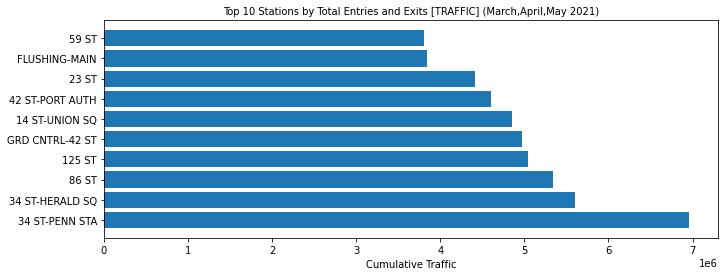

In [59]:
pyplt.figure(figsize=[11,4])
pyplt.barh(y=(station_totals['STATION'][:10]),width=station_totals['TOTAL TRAFFIC'][:10]);
pyplt.xlabel("Cumulative Traffic",fontsize=10);
pyplt.yticks(fontsize = '10',color='black');
pyplt.title('Top 10 Stations by Total Entries and Exits [TRAFFIC] (March,April,May 2021)',fontsize = 10)

pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_top10_stations.pdf')

In [60]:
#mta_turnstiles_daily_EE
mta_penn = mta_turnstiles_daily_EE[mta_turnstiles_daily_EE['STATION'] == '34 ST-PENN STA']
print('Number of turnstiles at 34-PENN STATION: %d' % len(mta_penn[['C/A','UNIT']].drop_duplicates()))

Number of turnstiles at 34-PENN STATION: 13


In [61]:
mta_penn[['C/A','UNIT']].drop_duplicates()

,C/A,UNIT
718699,N067,R012
726911,N068,R012
729077,N069,R013
731267,N070,R012
735067,N071,R013
738382,N072,R012
744340,N073,R013
1797229,R135,R031
1800511,R137,R031
1802148,R138,R293


In [62]:

import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina, enables diff formats, if multiple, uses best
%matplotlib inline #formatting figures with code in the notebook

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1) #style stuff to make it pretty

UsageError: unrecognized arguments: #formatting figures with code in the notebook


In [63]:
mta_turnstiles_daily_EE.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PERV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC,DATE,TIME
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2570445,2021-02-27 03:00:00,7537255.0,2570434.0,5.0,11.0,16.0,2021-02-27,07:00:00
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2570500,2021-02-27 07:00:00,7537260.0,2570445.0,25.0,55.0,80.0,2021-02-27,11:00:00
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2570546,2021-02-27 11:00:00,7537285.0,2570500.0,69.0,46.0,115.0,2021-02-27,15:00:00
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2570582,2021-02-27 15:00:00,7537354.0,2570546.0,147.0,36.0,183.0,2021-02-27,19:00:00
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2570596,2021-02-27 19:00:00,7537501.0,2570582.0,88.0,14.0,102.0,2021-02-27,23:00:00


## 1# 34 ST-PENN STA

In [64]:
import numpy as np

In [65]:
station_daily_34_penn = station_daily[station_daily['STATION']=='34 ST-PENN STA'].copy()
station_daily_34_penn.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
5551,34 ST-PENN STA,2021-02-27,16642.0,27183.0,43825.0
5552,34 ST-PENN STA,2021-02-28,15623.0,22617.0,38240.0
5553,34 ST-PENN STA,2021-03-01,32218.0,40714.0,72932.0
5554,34 ST-PENN STA,2021-03-02,32900.0,42983.0,75883.0
5555,34 ST-PENN STA,2021-03-03,33891.0,43608.0,77499.0


In [66]:
station_daily_34_penn.tail()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
5637,34 ST-PENN STA,2021-05-24,48178.0,59737.0,107915.0
5638,34 ST-PENN STA,2021-05-25,42623.0,53893.0,96516.0
5639,34 ST-PENN STA,2021-05-26,43285.0,60239.0,103524.0
5640,34 ST-PENN STA,2021-05-27,45179.0,58779.0,103958.0
5641,34 ST-PENN STA,2021-05-28,43130.0,63360.0,106490.0


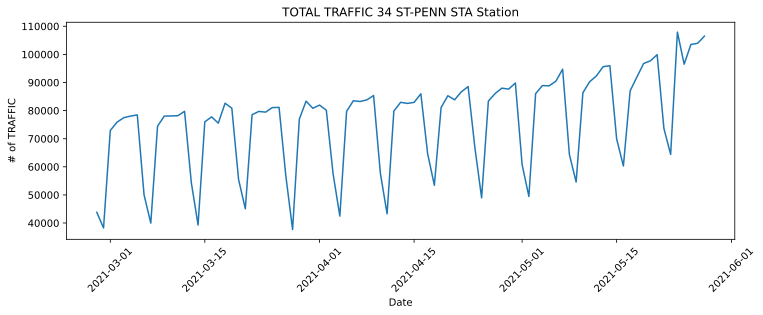

In [67]:
pyplt.figure(figsize=(12, 4))
pyplt.plot(station_daily_34_penn['DATE'],  station_daily_34_penn['TOTAL TRAFFIC'])# x and y
pyplt.ylabel('# of TRAFFIC')
pyplt.xlabel('Date')
pyplt.xticks(rotation=45)
pyplt.title('TOTAL TRAFFIC 34 ST-PENN STA Station');
pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_34st_datetraffic.pdf')

In [68]:
station_daily_34_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_penn['DATE']).dt.dayofweek #add day of week 
station_daily_34_penn.head()
#0 Monday
#1 Tuesday
#2 Wednesday
#3 Thursday
#4 Friday
#5 Saturday
#6 Sunday

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC,DAY_OF_WEEK_NUM
5551,34 ST-PENN STA,2021-02-27,16642.0,27183.0,43825.0,5
5552,34 ST-PENN STA,2021-02-28,15623.0,22617.0,38240.0,6
5553,34 ST-PENN STA,2021-03-01,32218.0,40714.0,72932.0,0
5554,34 ST-PENN STA,2021-03-02,32900.0,42983.0,75883.0,1
5555,34 ST-PENN STA,2021-03-03,33891.0,43608.0,77499.0,2


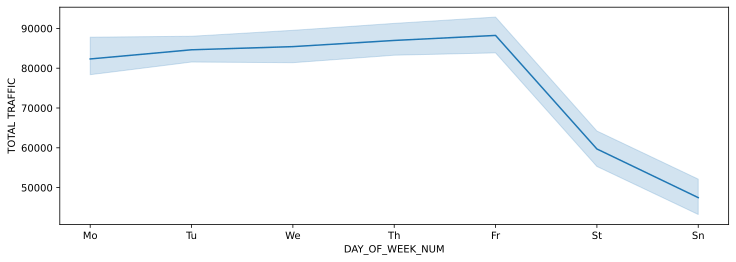

In [69]:
#another way! confidence interval
pyplt.figure(figsize=(12, 4))
sns.lineplot(data= station_daily_34_penn, x = "DAY_OF_WEEK_NUM", y = "TOTAL TRAFFIC")
pyplt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_dayweeknum_traffic.pdf')

In [71]:
#hue
#pyplt.figure(figsize=(12, 4))
#station_daily_34_penn['WEEK_OF_YEAR'] =  station_daily_34_penn['WEEK_OF_YEAR'].astype(str) #needs to be categorical for hue
#sns.lineplot(data= station_daily_34_penn, x = "DAY_OF_WEEK_NUM", y = "TOTAL TRAFFIC")

## 2# 34 ST-HERALD SQ

In [72]:
#34 ST-HERALD SQ
station_daily_34_ST_HERALD_SQ = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ'].copy() #using mask to segment df
station_daily_34_ST_HERALD_SQ.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
5369,34 ST-HERALD SQ,2021-02-27,15393.0,21928.0,37321.0
5370,34 ST-HERALD SQ,2021-02-28,12746.0,16536.0,29282.0
5371,34 ST-HERALD SQ,2021-03-01,25902.0,31589.0,57491.0
5372,34 ST-HERALD SQ,2021-03-02,26768.0,32765.0,59533.0
5373,34 ST-HERALD SQ,2021-03-03,28083.0,34441.0,62524.0


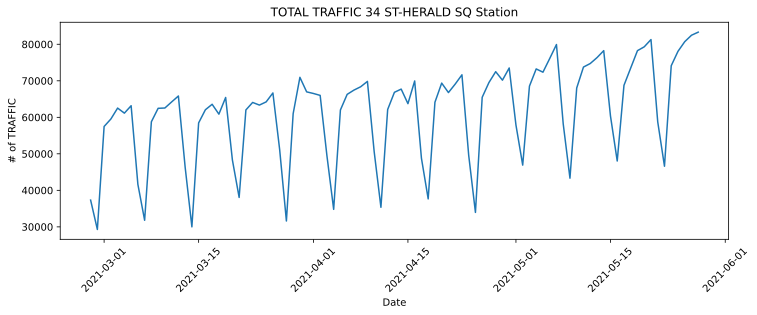

In [74]:
pyplt.figure(figsize=(12, 4))
pyplt.plot(station_daily_34_ST_HERALD_SQ['DATE'], station_daily_34_ST_HERALD_SQ['TOTAL TRAFFIC'])# x and y
pyplt.ylabel('# of TRAFFIC')
pyplt.xlabel('Date')
pyplt.xticks(rotation=45)
pyplt.title('TOTAL TRAFFIC 34 ST-HERALD SQ Station');
pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_34stherald_datetraffic.pdf')

In [75]:
station_daily_34_ST_HERALD_SQ['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_ST_HERALD_SQ['DATE']).dt.dayofweek #add day of week 
station_daily_34_penn.head()
#0 Monday
#1 Tuesday
#2 Wednesday
#3 Thursday
#4 Friday
#5 Saturday
#6 Sunday

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC,DAY_OF_WEEK_NUM
5551,34 ST-PENN STA,2021-02-27,16642.0,27183.0,43825.0,5
5552,34 ST-PENN STA,2021-02-28,15623.0,22617.0,38240.0,6
5553,34 ST-PENN STA,2021-03-01,32218.0,40714.0,72932.0,0
5554,34 ST-PENN STA,2021-03-02,32900.0,42983.0,75883.0,1
5555,34 ST-PENN STA,2021-03-03,33891.0,43608.0,77499.0,2


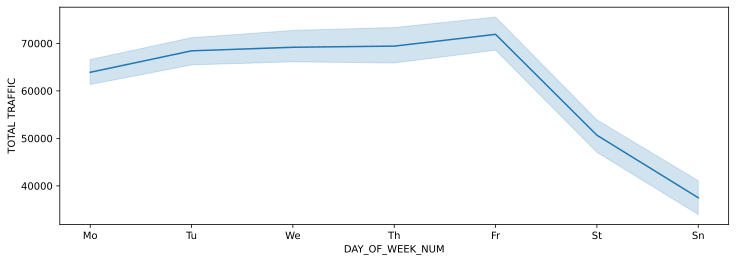

In [76]:
#confidence interval
pyplt.figure(figsize=(12, 4))
sns.lineplot(data= station_daily_34_ST_HERALD_SQ, x = "DAY_OF_WEEK_NUM", y = "TOTAL TRAFFIC")
pyplt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_34stherald_dayweektraffic.pdf')

## 3# 86 ST

In [77]:
#86_ST
station_daily_86_ST = station_daily[station_daily['STATION'] == '86 ST'].copy() #using mask to segment df
station_daily_86_ST.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
10007,86 ST,2021-02-27,13877.0,18695.0,32572.0
10008,86 ST,2021-02-28,11513.0,16144.0,27657.0
10009,86 ST,2021-03-01,26433.0,31072.0,57505.0
10010,86 ST,2021-03-02,27076.0,31638.0,58714.0
10011,86 ST,2021-03-03,28345.0,33164.0,61509.0


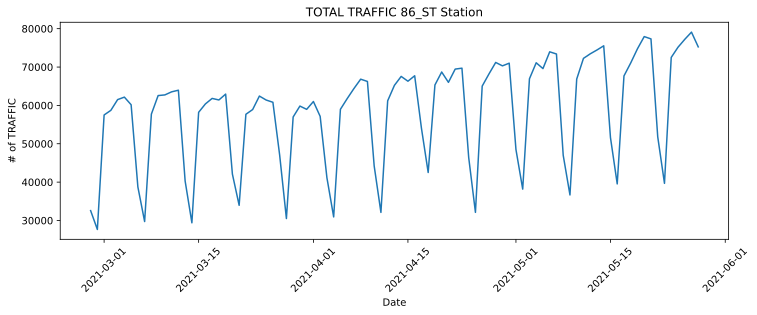

In [78]:
pyplt.figure(figsize=(12, 4))
pyplt.plot(station_daily_86_ST['DATE'], station_daily_86_ST['TOTAL TRAFFIC'])# x and y
pyplt.ylabel('# of TRAFFIC')
pyplt.xlabel('Date')
pyplt.xticks(rotation=45)
pyplt.title('TOTAL TRAFFIC 86_ST Station');
pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_86st_datetraffic.pdf')

In [79]:
station_daily_86_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_86_ST['DATE']).dt.dayofweek #add day of week 
station_daily_34_penn.head()
#0 Monday
#1 Tuesday
#2 Wednesday
#3 Thursday
#4 Friday
#5 Saturday
#6 Sunday

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC,DAY_OF_WEEK_NUM
5551,34 ST-PENN STA,2021-02-27,16642.0,27183.0,43825.0,5
5552,34 ST-PENN STA,2021-02-28,15623.0,22617.0,38240.0,6
5553,34 ST-PENN STA,2021-03-01,32218.0,40714.0,72932.0,0
5554,34 ST-PENN STA,2021-03-02,32900.0,42983.0,75883.0,1
5555,34 ST-PENN STA,2021-03-03,33891.0,43608.0,77499.0,2


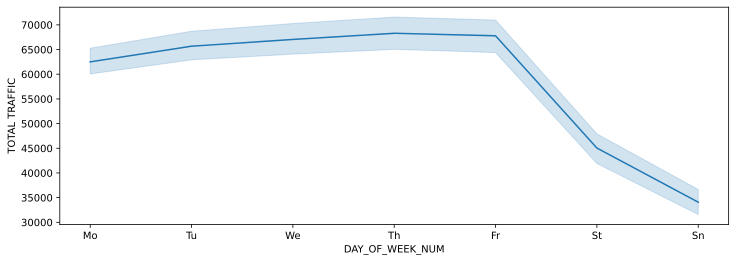

In [80]:
#confidence interval
pyplt.figure(figsize=(12, 4))
sns.lineplot(data= station_daily_86_ST, x = "DAY_OF_WEEK_NUM", y = "TOTAL TRAFFIC")
pyplt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
pyplt.savefig('/Users/amirreza/Desktop/Metis_ds_ml/Metis_BPM_Prework/NBM_EDA_Student/MTA_Project/figure_86st_dayweeknumtraffic.pdf')

## GRD CNTRL-42 ST

In [86]:
#station_daily is entries per station per day, one row is a station on a given day
#use .copy here so doesn't just point back to original df; intermediary b/c otherwise can't predict behavior; deep copy
station_daily_GRD_CNTRL_42_ST = station_daily[station_daily['STATION'] == 'GRD CNTRL-42 ST'].copy() #using mask to segment df
station_daily_GRD_CNTRL_42_ST.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
21200,GRD CNTRL-42 ST,2021-02-27,9099.0,13431.0,22530.0
21201,GRD CNTRL-42 ST,2021-02-28,7610.0,10444.0,18054.0
21202,GRD CNTRL-42 ST,2021-03-01,32400.0,37674.0,70074.0
21203,GRD CNTRL-42 ST,2021-03-02,25715.0,32920.0,58635.0
21204,GRD CNTRL-42 ST,2021-03-03,26023.0,33240.0,59263.0


In [87]:
station_daily_GRD_CNTRL_42_ST.tail()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
21286,GRD CNTRL-42 ST,2021-05-24,29896.0,40396.0,70292.0
21287,GRD CNTRL-42 ST,2021-05-25,32276.0,43018.0,75294.0
21288,GRD CNTRL-42 ST,2021-05-26,32913.0,44889.0,77802.0
21289,GRD CNTRL-42 ST,2021-05-27,32289.0,44134.0,76423.0
21290,GRD CNTRL-42 ST,2021-05-28,30462.0,42973.0,73435.0


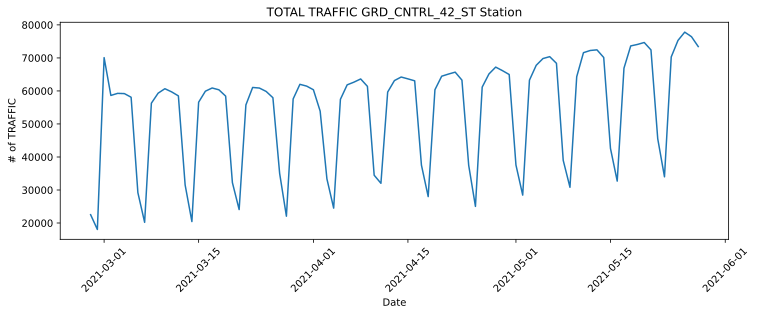

In [88]:
pyplt.figure(figsize=(12, 4))
pyplt.plot(station_daily_GRD_CNTRL_42_ST['DATE'], station_daily_GRD_CNTRL_42_ST['TOTAL TRAFFIC'])# x and y
pyplt.ylabel('# of TRAFFIC')
pyplt.xlabel('Date')
pyplt.xticks(rotation=45)
pyplt.title('TOTAL TRAFFIC GRD_CNTRL_42_ST Station');

In [89]:
import numpy as np

In [90]:
station_daily_GRD_CNTRL_42_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST['DATE']).dt.dayofweek #add day of week 
station_daily_GRD_CNTRL_42_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST['DATE']).dt.isocalendar().week #week num
station_daily_GRD_CNTRL_42_ST.head()
#0 Monday
#1 Tuesday
#2 Wednesday
#3 Thursday
#4 Friday
#5 Saturday
#6 Sunday

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
21200,GRD CNTRL-42 ST,2021-02-27,9099.0,13431.0,22530.0,5,8
21201,GRD CNTRL-42 ST,2021-02-28,7610.0,10444.0,18054.0,6,8
21202,GRD CNTRL-42 ST,2021-03-01,32400.0,37674.0,70074.0,0,9
21203,GRD CNTRL-42 ST,2021-03-02,25715.0,32920.0,58635.0,1,9
21204,GRD CNTRL-42 ST,2021-03-03,26023.0,33240.0,59263.0,2,9


In [91]:
station_daily_GRD_CNTRL_42_ST.groupby('WEEK_OF_YEAR').head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
21200,GRD CNTRL-42 ST,2021-02-27,9099.0,13431.0,22530.0,5,8
21201,GRD CNTRL-42 ST,2021-02-28,7610.0,10444.0,18054.0,6,8
21202,GRD CNTRL-42 ST,2021-03-01,32400.0,37674.0,70074.0,0,9
21203,GRD CNTRL-42 ST,2021-03-02,25715.0,32920.0,58635.0,1,9
21204,GRD CNTRL-42 ST,2021-03-03,26023.0,33240.0,59263.0,2,9
...,...,...,...,...,...,...,...
21286,GRD CNTRL-42 ST,2021-05-24,29896.0,40396.0,70292.0,0,21
21287,GRD CNTRL-42 ST,2021-05-25,32276.0,43018.0,75294.0,1,21
21288,GRD CNTRL-42 ST,2021-05-26,32913.0,44889.0,77802.0,2,21
21289,GRD CNTRL-42 ST,2021-05-27,32289.0,44134.0,76423.0,3,21


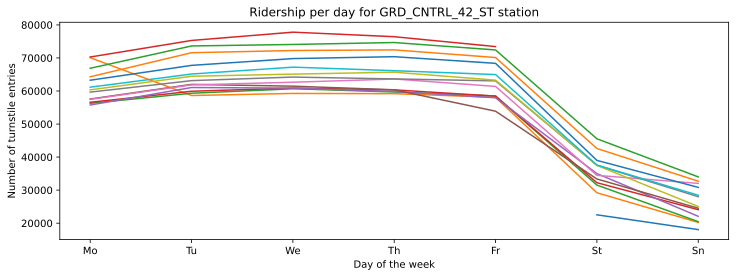

In [92]:

#plot multiple times on same axis
#each line is one week, one group in our df
pyplt.figure(figsize=(12, 4))
for i, group in station_daily_GRD_CNTRL_42_ST.groupby('WEEK_OF_YEAR'): #for each group (week) in our groupby
    pyplt.plot(group['DAY_OF_WEEK_NUM'], group['TOTAL TRAFFIC'])#create multiple plots, or lines
    
pyplt.xlabel('Day of the week')
pyplt.ylabel('Number of turnstile entries')
pyplt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
pyplt.title('Ridership per day for GRD_CNTRL_42_ST station');

<AxesSubplot:xlabel='DAY_OF_WEEK_NUM', ylabel='TOTAL TRAFFIC'>

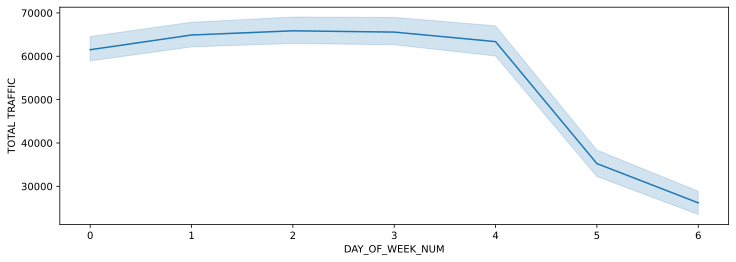

In [93]:

#another way! confidence interval
pyplt.figure(figsize=(12, 4))
sns.lineplot(data= station_daily_GRD_CNTRL_42_ST, x = "DAY_OF_WEEK_NUM", y = "TOTAL TRAFFIC")

<AxesSubplot:xlabel='DAY_OF_WEEK_NUM', ylabel='TOTAL TRAFFIC'>

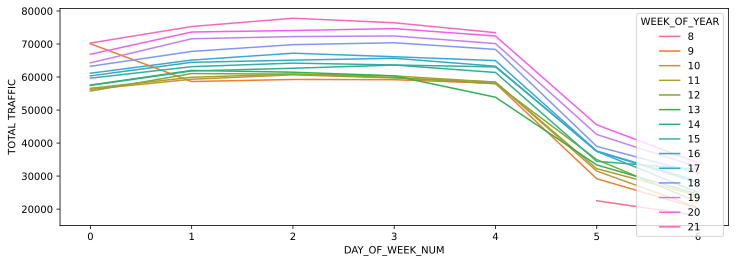

In [94]:

#hue
pyplt.figure(figsize=(12, 4))
station_daily_GRD_CNTRL_42_ST['WEEK_OF_YEAR'] = station_daily_GRD_CNTRL_42_ST['WEEK_OF_YEAR'].astype(str) #needs to be categorical for hue
sns.lineplot(data= station_daily_GRD_CNTRL_42_ST, x = "DAY_OF_WEEK_NUM", y = "TOTAL TRAFFIC", hue = "WEEK_OF_YEAR")

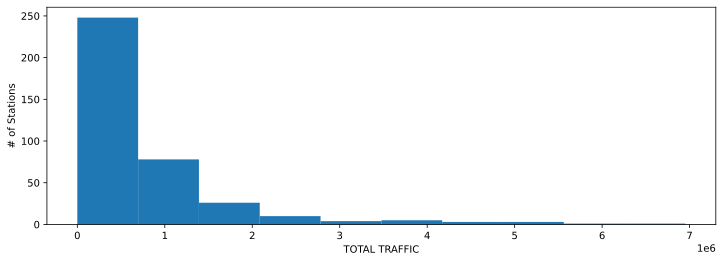

In [95]:

#station_totals df is total rides per station in our df
#histogram of daily entries by station, so on y axis, will have num of stations
pyplt.figure(figsize=(12, 4))
pyplt.hist(station_totals['TOTAL TRAFFIC']);
pyplt.xlabel('TOTAL TRAFFIC')
pyplt.ylabel('# of Stations');

In [96]:
mta_busy = mta_turnstiles_daily_EE[['DATE', 'TOTAL TRAFFIC']].groupby(['DATE']).sum().reset_index()
mta_busy['DATE'] = pd.to_datetime(mta_busy['DATE'])

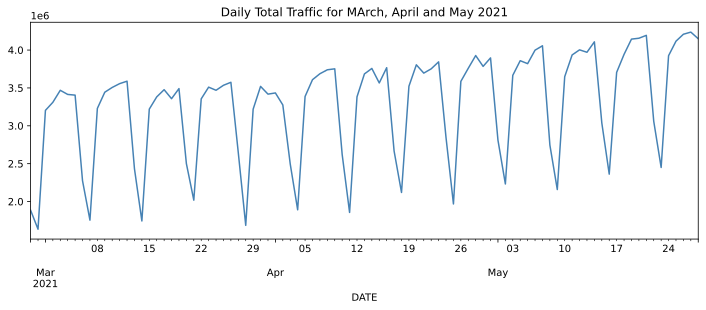

In [97]:
pyplt.figure(figsize=(12, 4))
mta_busy.set_index('DATE')['TOTAL TRAFFIC'].plot(color = 'steelblue')
pyplt.title('Daily Total Traffic for MArch, April and May 2021') 
pyplt.show()

# TIME TIME TIME

In [101]:
station_daily_time = mta_turnstiles_daily_EE.groupby(["STATION",'DATE', "TIME"])[['DAILY_ENTRIES','DAILY_EXITS','TOTAL TRAFFIC']].sum().reset_index()
station_daily_time.head()

,STATION,DATE,TIME,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
0,1 AV,2021-02-27,07:00:00,62.0,255.0,317.0
1,1 AV,2021-02-27,11:00:00,593.0,1252.0,1845.0
2,1 AV,2021-02-27,15:00:00,1236.0,2130.0,3366.0
3,1 AV,2021-02-27,19:00:00,1514.0,2321.0,3835.0
4,1 AV,2021-02-27,23:00:00,988.0,1658.0,2646.0


In [103]:
station_totals_time = station_daily_time.groupby(['STATION','TIME'])['TOTAL TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('TOTAL TRAFFIC', ascending=False)

station_totals.sort_values('TOTAL TRAFFIC',ascending=False).head(15)

,STATION,TOTAL TRAFFIC
61,34 ST-PENN STA,6952125.0
59,34 ST-HERALD SQ,5603618.0
110,86 ST,5335715.0
9,125 ST,5045193.0
233,GRD CNTRL-42 ST,4974722.0
14,14 ST-UNION SQ,4857205.0
68,42 ST-PORT AUTH,4602789.0
46,23 ST,4414179.0
217,FLUSHING-MAIN,3846385.0
85,59 ST,3811651.0


In [104]:
station_daily_34_penn_time = station_daily_time[station_daily_time['STATION']=='34 ST-PENN STA'].copy()
station_daily_34_penn_time.head(10)

,STATION,DATE,TIME,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
43471,34 ST-PENN STA,2021-02-27,05:00:00,45.0,130.0,175.0
43472,34 ST-PENN STA,2021-02-27,07:00:00,540.0,1174.0,1714.0
43473,34 ST-PENN STA,2021-02-27,09:00:00,729.0,1013.0,1742.0
43474,34 ST-PENN STA,2021-02-27,11:00:00,1722.0,4134.0,5856.0
43475,34 ST-PENN STA,2021-02-27,13:00:00,1106.0,1849.0,2955.0
43476,34 ST-PENN STA,2021-02-27,15:00:00,3111.0,5536.0,8647.0
43477,34 ST-PENN STA,2021-02-27,17:00:00,1572.0,2337.0,3909.0
43478,34 ST-PENN STA,2021-02-27,19:00:00,4275.0,6180.0,10455.0
43479,34 ST-PENN STA,2021-02-27,21:00:00,1251.0,1876.0,3127.0
43480,34 ST-PENN STA,2021-02-27,23:00:00,2291.0,2954.0,5245.0


In [109]:
mta_penn = station_daily_time[(station_daily_time['STATION'] == '34 ST-PENN STA')]
mta_penn['TIME'] = pd.to_datetime(station_daily_time['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample
mta_penn_grouped = mta_penn.groupby(['TIME']).agg({'TOTAL TRAFFIC': sum}).sort_values(by = 'TOTAL TRAFFIC', ascending = False)
#mta_penn_grouped.resample('60T',convention='end').sum().sort_values(by = 'TOTAL TRAFFIC', ascending = False).head()

/var/folders/3b/d88c396s1jx1hf72ltg_cc4r0000gn/T/ipykernel_21534/3655306841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_penn['TIME'] = pd.to_datetime(station_daily_time['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample


In [115]:
mta_penn_grouped.head()

,TOTAL TRAFFIC
TIME,
1900-01-01 20:00:00,1225661.0
1900-01-01 16:00:00,1063498.0
1900-01-01 12:00:00,836601.0
1900-01-01 18:00:00,567777.0
1900-01-01 08:00:00,533077.0


In [117]:
station_daily_34st_hetald_time = station_daily_time[station_daily_time['STATION']=='34 ST-HERALD SQ'].copy()
station_daily_34st_hetald_time.head(10)

,STATION,DATE,TIME,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
42370,34 ST-HERALD SQ,2021-02-27,07:00:00,329.0,950.0,1279.0
42371,34 ST-HERALD SQ,2021-02-27,11:00:00,1580.0,4227.0,5807.0
42372,34 ST-HERALD SQ,2021-02-27,15:00:00,3669.0,6472.0,10141.0
42373,34 ST-HERALD SQ,2021-02-27,19:00:00,6241.0,7100.0,13341.0
42374,34 ST-HERALD SQ,2021-02-27,23:00:00,3574.0,3179.0,6753.0
42375,34 ST-HERALD SQ,2021-02-28,03:00:00,908.0,840.0,1748.0
42376,34 ST-HERALD SQ,2021-02-28,07:00:00,221.0,665.0,886.0
42377,34 ST-HERALD SQ,2021-02-28,11:00:00,1263.0,3121.0,4384.0
42378,34 ST-HERALD SQ,2021-02-28,15:00:00,3135.0,5510.0,8645.0
42379,34 ST-HERALD SQ,2021-02-28,19:00:00,4723.0,4624.0,9347.0


In [119]:
mta_herald = station_daily_time[(station_daily_time['STATION'] == '34 ST-HERALD SQ')]
mta_herald['TIME'] = pd.to_datetime(station_daily_time['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample
mta_herald_grouped = mta_herald.groupby(['TIME']).agg({'TOTAL TRAFFIC': sum}).sort_values(by = 'TOTAL TRAFFIC', ascending = False)

/var/folders/3b/d88c396s1jx1hf72ltg_cc4r0000gn/T/ipykernel_21534/1558212803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_herald['TIME'] = pd.to_datetime(station_daily_time['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample


In [120]:
mta_herald_grouped.head()

,TOTAL TRAFFIC
TIME,
1900-01-01 20:00:00,1548280.0
1900-01-01 16:00:00,1234399.0
1900-01-01 12:00:00,1029292.0
1900-01-01 00:00:00,482340.0
1900-01-01 08:00:00,421386.0


In [121]:
station_daily_86st_time = station_daily_time[station_daily_time['STATION']=='86 ST'].copy()
station_daily_86st_time.head(10)

,STATION,DATE,TIME,DAILY_ENTRIES,DAILY_EXITS,TOTAL TRAFFIC
72999,86 ST,2021-02-27,04:00:00,46.0,87.0,133.0
73000,86 ST,2021-02-27,07:00:00,360.0,588.0,948.0
73001,86 ST,2021-02-27,08:00:00,249.0,414.0,663.0
73002,86 ST,2021-02-27,11:00:00,1636.0,3431.0,5067.0
73003,86 ST,2021-02-27,12:00:00,731.0,1038.0,1769.0
73004,86 ST,2021-02-27,15:00:00,2809.0,4399.0,7208.0
73005,86 ST,2021-02-27,16:00:00,1060.0,1418.0,2478.0
73006,86 ST,2021-02-27,19:00:00,4105.0,4017.0,8122.0
73007,86 ST,2021-02-27,20:00:00,1034.0,1360.0,2394.0
73008,86 ST,2021-02-27,23:00:00,1847.0,1943.0,3790.0


In [124]:
mta_86st = station_daily_time[(station_daily_time['STATION'] == '86 ST')]
mta_86st['TIME'] = pd.to_datetime(station_daily_time['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample
mta_86st_grouped = mta_86st.groupby(['TIME']).agg({'TOTAL TRAFFIC': sum}).sort_values(by = 'TOTAL TRAFFIC', ascending = False)

/var/folders/3b/d88c396s1jx1hf72ltg_cc4r0000gn/T/ipykernel_21534/3006297966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_86st['TIME'] = pd.to_datetime(station_daily_time['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample


In [125]:
mta_86st_grouped.head()

,TOTAL TRAFFIC
TIME,
1900-01-01 20:00:00,1058374.0
1900-01-01 16:00:00,950672.0
1900-01-01 12:00:00,841569.0
1900-01-01 08:00:00,418763.0
1900-01-01 00:00:00,324004.0


In [116]:
'''pyplt.figure(figsize=(12, 4))
pyplt.scatter(mta_penn_grouped['TIME'], mta_penn_grouped['TOTAL TRAFFIC'])# x and y
pyplt.ylabel('# of TRAFFIC')
pyplt.xlabel('TIME')
pyplt.xticks(rotation=45)
pyplt.title('High TRAFFIC HOURS of 34 ST PENN STA Station');'''

"pyplt.figure(figsize=(12, 4))\npyplt.scatter(mta_penn_grouped['TIME'], mta_penn_grouped['TOTAL TRAFFIC'])# x and y\npyplt.ylabel('# of TRAFFIC')\npyplt.xlabel('TIME')\npyplt.xticks(rotation=45)\npyplt.title('High TRAFFIC HOURS of 34 ST PENN STA Station');"

In [ ]:
#station_daily is entries per station per day, one row is a station on a given day
#use .copy here so doesn't just point back to original df; intermediary b/c otherwise can't predict behavior; deep copy
station_daily_GRD_CNTRL_42_ST_time = station_daily_time[station_daily_time['STATION'] == 'GRD CNTRL-42 ST'].copy() #using mask to segment df
station_daily_GRD_CNTRL_42_ST_time.head(10)

In [ ]:
station_daily_GRD_CNTRL_42_ST_time['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST_time['DATE']).dt.dayofweek #add day of week 
station_daily_GRD_CNTRL_42_ST_time.head()
#0 Monday
#1 Tuesday
#2 Wednesday
#3 Thursday
#4 Friday
#5 Saturday
#6 Sunday

In [ ]:
GRD_TIME_DofW = station_daily_GRD_CNTRL_42_ST_time.groupby(['DAY_OF_WEEK_NUM', "TIME"])[['TOTAL TRAFFIC']].sum().reset_index()
GRD_TIME_DofW

In [ ]:
pyplt.figure(figsize=(12, 4))
pyplt.plot(station_daily_GRD_CNTRL_42_ST_time['TIME'], station_daily_GRD_CNTRL_42_ST_time['TOTAL TRAFFIC'])# x and y
pyplt.ylabel('# of TRAFFIC')
pyplt.xlabel('TIME')
pyplt.xticks(rotation=45)
pyplt.title('TOTAL TRAFFIC GRD_CNTRL_42_ST Station vs Time intevals');

In [ ]:
#plot multiple times on same axis
#each line is one week, one group in our df
pyplt.figure(figsize=(12, 4))
for i, group in station_daily_GRD_CNTRL_42_ST.groupby('WEEK_OF_YEAR'): #for each group (week) in our groupby
    pyplt.plot(group['DAY_OF_WEEK_NUM'], group['TOTAL TRAFFIC'])#create multiple plots, or lines
    
pyplt.xlabel('Day of the week')
pyplt.ylabel('Number of turnstile entries')
pyplt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
pyplt.title('Ridership per day for GRD_CNTRL_42_ST station');

In [ ]:
mta_penn = mta_turnstiles_daily_EE[(mta_turnstiles_daily_EE['Station'] == '34 ST-PENN STA')]
mta_penn['TIME'] = pd.to_datetime(mta_penn['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample
mta_penn_grouped = mta_penn.groupby(['time']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False)
mta_penn_grouped.resample('60T',convention='end').sum().sort_values(by = 'busy', ascending = False).head()